# Introduction

We are creating a model that can help a real estate company predict at what price they should sell a listing for!

In the first half of this notebook is a quick exploration of the dataframe we have found on the sales of Kind County Houses.

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [186]:
df = pd.read_csv('./data/kc_house_data.csv')

In [148]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

It seems that there are 3 columns that have incomplete values, those being waterfront, view and yr_renovated.

# Addressing the Nan Values in 'Waterfront'

We would like to be able to include the information in the waterfront feature but need to address the 2000+ Nan entries which will be difficult because finding that information with just a dataframe isn't a walk in the park.

In [8]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [22]:
nanwater = df.loc[df['waterfront'].isnull()]

In [23]:
nanwater.to_csv('nanwater.csv')

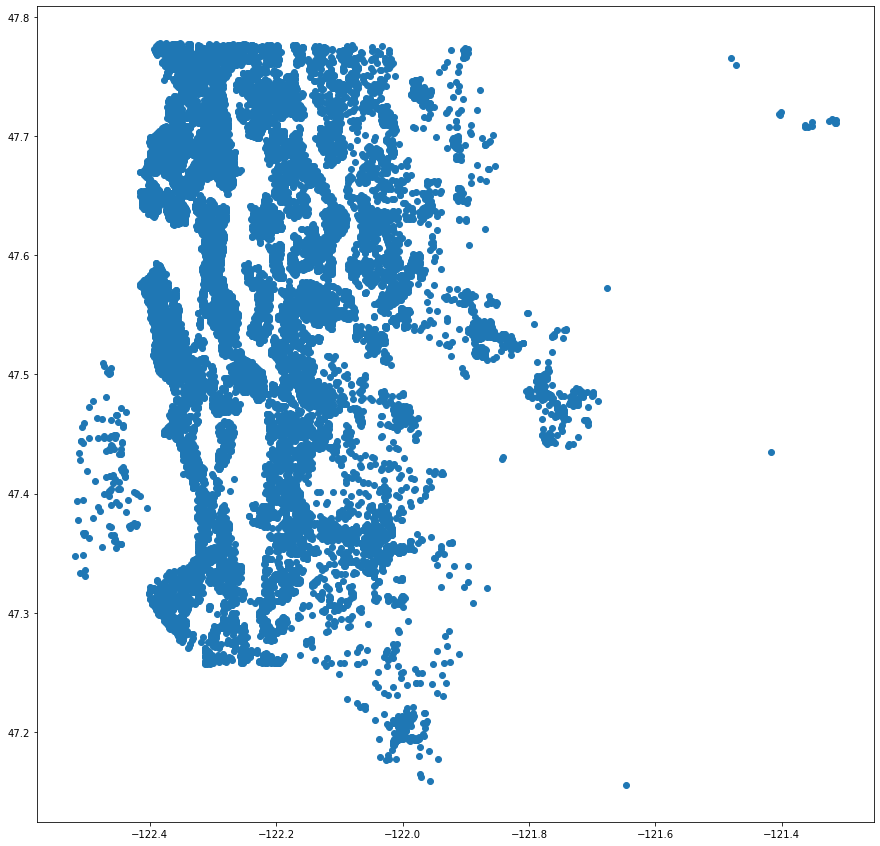

In [24]:
fig = plt.subplots(figsize = (15,15))
plt.scatter(df['long'], df['lat']);

After vizualizing this data in Tabelau I was able to come to the conclusion that the Nan values in waterfront were not set as Nan values because they were not waterfront as previously thought. The addresses listed are a mixture of waterfront and non-waterfront which leads me to wanting to remove the rows with Nan values. With a little bit of Tableau magic I was able to locate the 79 entries of homes that were waterfront but marked as NAN.

# Corrolation Heatmap

Im going to take a quick aside before addressing the NaN values in waterfront to look at a corrolation heatmap in hopes of getting a better understanding of what relations these columns have with eachother.

In [25]:
clean_df = df.copy(deep=True)

In [26]:
clean_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
clean_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


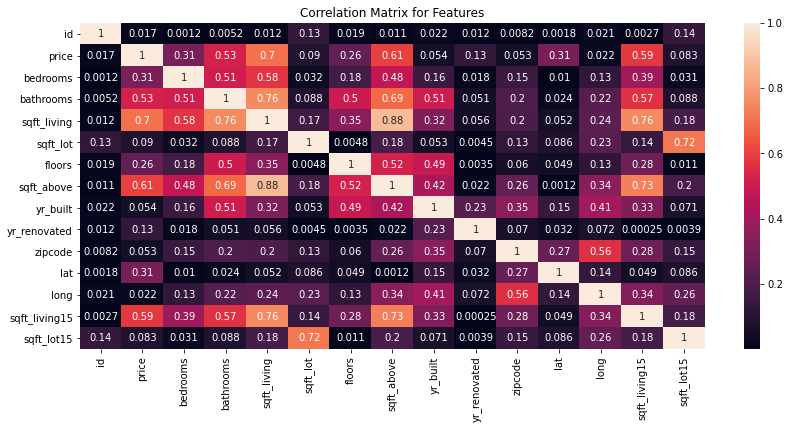

In [30]:
plt.figure(figsize=(14, 6))
sns.heatmap(clean_df.corr().abs(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

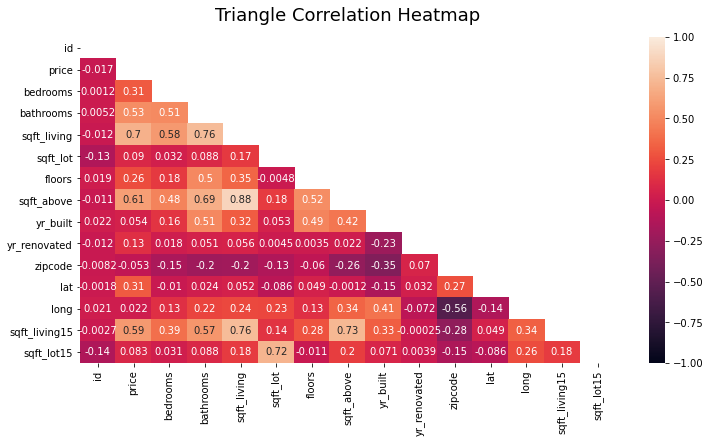

In [31]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(clean_df.corr(), dtype=bool))
heatmap = sns.heatmap(clean_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Columns that I nominate we drop! Are: sqft_lot15, long, lat, yr built, sqft_lot. 

# We shall now resume the Saga of waterfront Nan.

Through Tableau I exported the DF of the 79 entries that needed to be changed from NAN to YES. All other frames of NAN will be changed to NO. Below I am importing the CSV that has the IDs of all the entries to be changed to YES.

In [32]:
waterfront_id = pd.read_csv('./data/waterfront - Sheet1.csv')

In [33]:
waterfront_id

,Id,Lat,Long
0,46100204,47.5673,-122.210
1,46100504,47.5648,-122.210
2,121039042,47.3351,-122.362
3,148000705,47.5732,-122.411
4,518500610,47.5299,-122.203
...,...,...,...
74,8550001515,47.3551,-122.475
75,8888000055,47.4781,-122.490
76,9201300020,47.5789,-122.076
77,9273200145,47.5909,-122.384


In [37]:
waterfront_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      79 non-null     int64  
 1   Lat     79 non-null     float64
 2   Long    79 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [60]:
waterfront_id['Id']

0       46100204
1       46100504
2      121039042
3      148000705
4      518500610
         ...    
74    8550001515
75    8888000055
76    9201300020
77    9273200145
78    9829200325
Name: Id, Length: 79, dtype: int64

To accomplish my goal of having every waterfront house labeled as such I will create a master list of all the IDs that need a YES value. To do this I first needed to create list of unique values for Ids in waterfront dataframe. remember that this is the dataframe of all the waterfront properties that used to be listed as NAN.

In [106]:
water_ids = waterfront_id['Id'].unique()

Create list of the unique values for Ids from the original dataframe.

In [167]:
og_water = df[df['waterfront'] == 'YES']

In [169]:
og_water_ids = og_water['id'].unique()

These are my two np.arrays that will be combined together as lists to create a master list which I called final because I was lostss in the sauce and couldnt come up with descriptive names.

In [170]:
og_water_ids

array([ 822039084, 8096000060, 2025069065, 2123039032, 3225069065,
       2122039094,  622049114, 3760500116, 7567600045, 4055701200,
       8069000075, 1247600105, 3523029041, 7636800041, 7558700030,
       1925069082, 7663700030, 8073000550, 1925069121, 1922039062,
       3623500260, 8106100105, 1224059053, 3343301920, 1724069062,
       7524900003, 7738500731, 4114601570, 2322029048, 1827200265,
       8073000495, 3343301910, 9808700762, 1269200229,  724069059,
       1025039086, 3342104046, 7781600025, 4166600115, 5154200015,
       1724069059, 1324049015, 9201300050,  121029034, 9253900417,
       6744701310,  623059016,  222029026, 2024069008, 2624049091,
       7936500190, 4217402115, 5442300807, 4131900066, 8917100020,
       3024059014, 9362000040, 4134300175, 1924059029, 1121039059,
       1724069079, 7129303045,  221029019,  724069023, 3343302110,
       3222049055, 7352200100, 3124059023, 7352200025,  121039083,
       7631200310,  625059036,  333100295, 6117502220, 5154700

In [114]:
water_ids

array([  46100204,   46100504,  121039042,  148000705,  518500610,
        521049227,  573000685,  587550280,  623039026,  824059265,
        825059178,  868001790,  913000340, 1454600256, 1524039043,
       1568100920, 1724069060, 1814800060, 1822039138, 1825069031,
       1959701890, 1962200435, 1964700054, 2025049111, 2025049114,
       2025069025, 2344300180, 2525049263, 2560805440, 2579500110,
       2581300055, 2607801120, 2726049034, 2818600060, 2929600035,
       3222049159, 3342100569, 3342700371, 3577000116, 3616600003,
       3629160060, 3760500280, 3760500516, 3761700053, 3896100130,
       4058200040, 4154303215, 4218400100, 4385700660, 4385700735,
       4441300170, 5067400032, 5215200010, 5249803645, 5451300105,
       5486800070, 5700003630, 6102400166, 6117500320, 6117501015,
       6329000050, 6371000026, 6372000280, 6398000191, 7129303070,
       7203600040, 7203600560, 7430500301, 7524950710, 7632400400,
       7768800290, 7772800020, 7781600100, 8106100085, 8550001

convert both np.array to lists and combione them together so that we can search them in the whatever function. "whatever" is actually the name of the function because.. well.. I was lost in the sauce and thats just the name that I had in the moment..

In [176]:
og_water_list = og_water_ids.tolist()

In [177]:
water_list = water_ids.tolist()

In [182]:
final = water_list + og_water_list

In [187]:
def whatever(row):
    if row['id'] in final:
        return "YES"
    else:
        return "NO"
df['waterfront'] = df.apply(whatever, axis = 1)

In [188]:
df['waterfront'].value_counts()

NO     21371
YES      226
Name: waterfront, dtype: int64

# No more Nans in my waterfront column!

In [189]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# What are other dirty things that we can clean??

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We can see here that there are still a few Null values in 'view' and in 'yr_renovated'. It will also be important to change date, view, waterfront, view, condition, and grade to numerical values to better serve our regresions.

# Lets take a look at cleaning view!

In [197]:
df['view'].isna().sum()

63

In [198]:
df[df["view"].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,5/28/2014,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,...,11 Excellent,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
20148,291310170,8/4/2014,384500.0,3,2.50,1600,2610,2.0,NO,NaN,...,8 Good,1600,0.0,2005,NaN,98027,47.5344,-122.068,1445,1288
20380,1196003740,9/24/2014,734000.0,5,4.25,4110,42755,2.0,NO,NaN,...,10 Very Good,2970,1140.0,2000,NaN,98023,47.3375,-122.337,2730,12750
21057,3448900290,8/28/2014,636230.0,4,2.50,2840,6284,2.0,NO,NaN,...,9 Better,2840,0.0,2013,0.0,98056,47.5135,-122.169,2790,7168


In [200]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

It seems like we have a few options here, one would be to drop the rows, which personally I dont have a problem with seeing as how we will most likely still have a strong model afterwards. We could also replace with the mean seeing as how adding a few more values in there probably wouldnt mess up a single variate regression but I think it might start having consiquences in a multi but.. i dont know.. It was also stated in the project description that deleting the view column wasnt a bad idea?

In [206]:
drop_view_df = df.copy(deep=True)

In [207]:
drop_view_df = drop_view_df.dropna(subset=['view'])

In [208]:
drop_view_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [209]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

Well, 21,500 aint all that bad.. I think we can still make a good model with that many values!

# What about yr_renovated?

In [210]:
drop_view_df.yr_renovated.value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [211]:
drop_view_df['yr_renovated'].isna().sum()

3830

What I'm gather from this is that 17,000 have never been renovated!? and tbh, a renovation in 1950, does that even count as a renovation??? like, what is the cut off for a renovation? doesn't renovation imply that its kind of new feeling?? I think it would probably be fine to call all of these NaNs a 0. But 4000 is kind of a lot of data to be throwing around. But like where else would you put it? Imma just change them to 0 because there is a 20/21 chance they were gonna end up there anyways.

In [212]:
drop_view_df['yr_renovated']=drop_view_df['yr_renovated'].fillna(0)

In [214]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

Now we have no more Null values! We just need to change our non-numericals to num form.

# Converting to number form!

What columns were we talking about again?? date, waterfront, view, condition, and grade. Date will probably be the easiest to deal with.

# Convert Date from object to datetime.

In [215]:
drop_view_df['date']= pd.to_datetime(drop_view_df['date'])

In [216]:
drop_view_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  float64       
 3   bedrooms       21534 non-null  int64         
 4   bathrooms      21534 non-null  float64       
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  float64       
 8   waterfront     21534 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21534 non-null  object        
 11  grade          21534 non-null  object        
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21534 non-null  object        
 14  yr_built       21534 non-null  int64         
 15  yr_renovated   2153

# Convert Waterfront from Y/N to 1 and 0

In [218]:
numerical_value_clean = drop_view_df.copy(deep=True)

In [219]:
numerical_value_clean.waterfront = numerical_value_clean.waterfront.map({'YES': 1, 'NO': 0})

In [220]:
numerical_value_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Well that one wasn't so bad! Now I think we just have the more complex ones to do! I just need to verify that we actually need all of those columns!

In [221]:
numerical_value_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  float64       
 3   bedrooms       21534 non-null  int64         
 4   bathrooms      21534 non-null  float64       
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  float64       
 8   waterfront     21534 non-null  int64         
 9   view           21534 non-null  object        
 10  condition      21534 non-null  object        
 11  grade          21534 non-null  object        
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21534 non-null  object        
 14  yr_built       21534 non-null  int64         
 15  yr_renovated   2153

im noticing that sqft_basement is an object which i dont like

# Whats up with sqft_basement?

In [225]:
numerical_value_clean.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
176.0         1
652.0         1
556.0         1
1798.0        1
1525.0        1
Name: sqft_basement, Length: 302, dtype: int64

Why does it have ? in there? what will I do with that?? Imma pull a Praveen and just delete em.

In [226]:
numerical_value_clean = numerical_value_clean[numerical_value_clean.sqft_basement != '?']

In [228]:
numerical_value_clean.sqft_basement.value_counts()

0.0       12798
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
176.0         1
652.0         1
556.0         1
1798.0        1
1525.0        1
Name: sqft_basement, Length: 301, dtype: int64

In [229]:
numerical_value_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21082 non-null  int64         
 1   date           21082 non-null  datetime64[ns]
 2   price          21082 non-null  float64       
 3   bedrooms       21082 non-null  int64         
 4   bathrooms      21082 non-null  float64       
 5   sqft_living    21082 non-null  int64         
 6   sqft_lot       21082 non-null  int64         
 7   floors         21082 non-null  float64       
 8   waterfront     21082 non-null  int64         
 9   view           21082 non-null  object        
 10  condition      21082 non-null  object        
 11  grade          21082 non-null  object        
 12  sqft_above     21082 non-null  int64         
 13  sqft_basement  21082 non-null  object        
 14  yr_built       21082 non-null  int64         
 15  yr_renovated   2108

In [232]:
almost_done_cleaning = numerical_value_clean.copy(deep=True)

In [233]:
almost_done_cleaning['sqft_basement'] = pd.to_numeric(almost_done_cleaning['sqft_basement'])

In [234]:
almost_done_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21082 non-null  int64         
 1   date           21082 non-null  datetime64[ns]
 2   price          21082 non-null  float64       
 3   bedrooms       21082 non-null  int64         
 4   bathrooms      21082 non-null  float64       
 5   sqft_living    21082 non-null  int64         
 6   sqft_lot       21082 non-null  int64         
 7   floors         21082 non-null  float64       
 8   waterfront     21082 non-null  int64         
 9   view           21082 non-null  object        
 10  condition      21082 non-null  object        
 11  grade          21082 non-null  object        
 12  sqft_above     21082 non-null  int64         
 13  sqft_basement  21082 non-null  float64       
 14  yr_built       21082 non-null  int64         
 15  yr_renovated   2108

# How many different values are in view, condition, and grade?

In [235]:
almost_done_cleaning.view.value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [236]:
almost_done_cleaning.grade.value_counts()

7 Average        8762
8 Good           5922
9 Better         2546
6 Low Average    1991
10 Very Good     1108
11 Excellent      389
5 Fair            235
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [237]:
almost_done_cleaning.condition.value_counts()

Average      13688
Good          5538
Very Good     1662
Fair           166
Poor            28
Name: condition, dtype: int64

# Simple Linear Regression Regress

While my group gets back to me on while of these things they would like to focus on, Im gonna do a simple linear regression.

In [238]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [239]:
X = almost_done_cleaning[['sqft_living']]
y = almost_done_cleaning['price']

model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = model.fit()
results

In [240]:
simple_model_sumamry = results.summary()
simple_model_sumamry

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.048e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:55:32   Log-Likelihood:            -2.9287e+05
No. Observations:               21082   AIC:                         5.857e+05
Df Residuals:                   21080   BIC:                         5.858e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4456.393     -9.709      0.000    -5.2e+04   -3.45e+04
sqft_living   280.4877      1.960    143.116      0.000     276.646     284.329
==============================================================================
Omnibus:                    14303.984   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509767.330
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      26.437   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well it seems like for a starting point that price and sqft_living seem to explain 50% the variance. lets see if we cant get that number a little higher? But is it important to see if all the graphs are a normal distribution?

# Before we go into multivariate lets look at all the distributions of our columns!

In [242]:
almost_done_cleaning.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

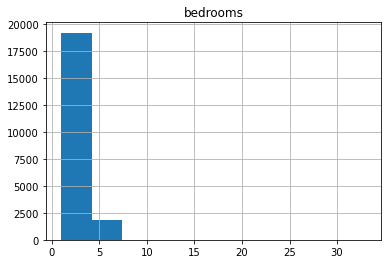

In [244]:
almost_done_cleaning.hist(column='bedrooms');

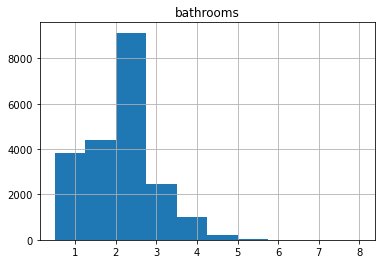

In [245]:
almost_done_cleaning.hist(column='bathrooms');

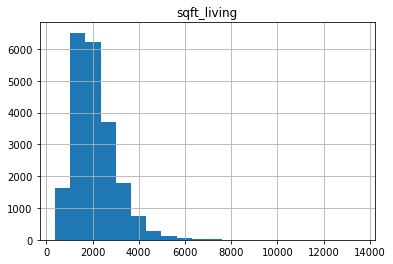

In [247]:
almost_done_cleaning.hist(column='sqft_living', bins = 20);

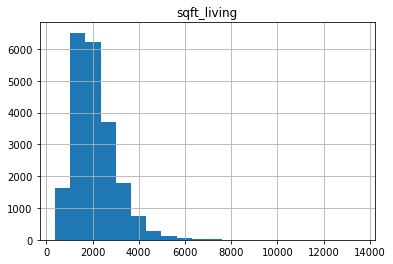

In [248]:
almost_done_cleaning.hist(column='sqft_living', bins = 20);

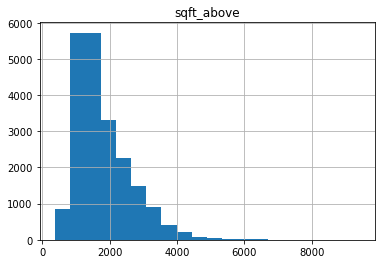

In [249]:
almost_done_cleaning.hist(column='sqft_above', bins = 20);

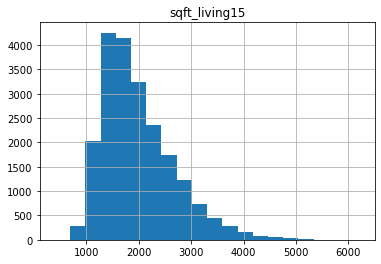

In [250]:
almost_done_cleaning.hist(column='sqft_living15', bins = 20);

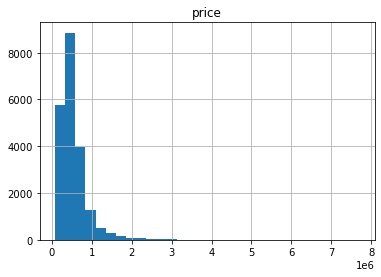

In [253]:
almost_done_cleaning.hist(column='price', bins = 30);

# Applying logs to see if we can get nromal distros from some of these things

In [254]:
almost_done_cleaning['logged_price'] = np.log(almost_done_cleaning['price']) 

In [280]:
almost_done_cleaning.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged_price,logged_sqft_living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614,7.851661
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549


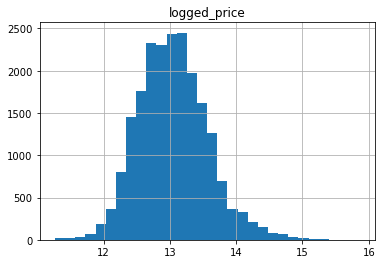

In [255]:
almost_done_cleaning.hist(column='logged_price', bins = 30);

In [259]:
almost_done_cleaning['logged_sqft_living'] = np.log(almost_done_cleaning['sqft_living']) 

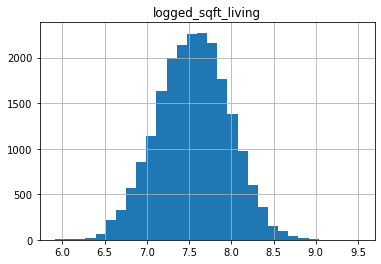

In [260]:
almost_done_cleaning.hist(column='logged_sqft_living', bins = 30);

In [266]:
X_logged_sqft_living = almost_done_cleaning[['logged_sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

model_logged_price = sm.OLS(endog = y_logged_price, exog = sm.add_constant(X_logged_sqft_living))
results_logged_price = model_logged_price.fit()
results_logged_price

In [267]:
price_logged_summary = results_logged_price.summary()
price_logged_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:58:10   Log-Likelihood:                -9989.5
No. Observations:               21082   AIC:                         1.998e+04
Df Residuals:                   21080   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.7255      0.048    140.854      0.000       6.632       6.819
logged_sqft_living     0.8374      0.006    132.627      0.000       0.825       0.850
==============================================================================
Omnibus:                      121.177   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.122
Skew:                           0.144   Prob(JB):                     4.50e-25
Kurtosis:                       2.789   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Maybe we need to normalize them first? I seem to remember this as a step..?

In [263]:
from sklearn import preprocessing

well charlie seems to think that isnt the case! he is saying that you only have to apply the log to the target feature so maybe I will try that!

In [270]:
X = almost_done_cleaning[['sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

charlie_model_logged_price = sm.OLS(endog = y_logged_price, exog = sm.add_constant(X)).fit()
charlie_model_logged_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:07:23   Log-Likelihood:                -9429.6
No. Observations:               21082   AIC:                         1.886e+04
Df Residuals:                   21080   BIC:                         1.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2190      0.006   1892.173      0.000      12.206      12.232
sqft_living     0.0004   2.84e-06    140.355      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.309
Skew:                           0.029   Prob(JB):                        0.191
Kurtosis:                       2.982   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hmm well it did seem to bring it back up but it didnt do as well as the original non-logged price so idk.. going to have to ask about that for sure.

# Hmm.. maybe I have messed something up.. lets try again following hte directions and not from memory and maybe that will help.

In [286]:
X = almost_done_cleaning['sqft_living']
y = almost_done_cleaning['price']

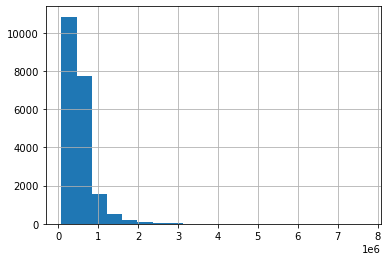

In [275]:
y.hist(bins = 20);

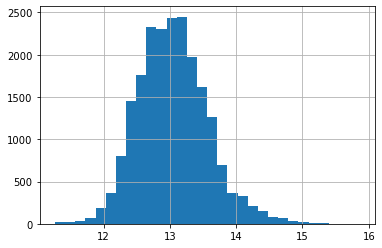

In [278]:
y_scld = np.log(y)
y_scld.hist(bins = 30);

In [281]:
y_scld

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 21082, dtype: float64

In [284]:
almost_done_cleaning['logged_price']

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: logged_price, Length: 21082, dtype: float64

hmmm okay, it looks the same so far..

In [282]:
model_price_sqft_living = sm.OLS(y_scld, X).fit()
model_price_sqft_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.258e+05
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        21:15:38   Log-Likelihood:                         -63618.
No. Observations:               21082   AIC:                                  1.272e+05
Df Residuals:                   21081   BIC:                                  1.272e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.0053    1.5e-05    354.732      0.000       0.005       0.005
==============================================================================
Omnibus:                     6977.917   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36969.648
Skew:                          -1.505   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

hmmmm... well thats a pretty good improvement?! I wonder what I have done wrong in imputting my values?

In [289]:
X = almost_done_cleaning[['sqft_living']]
y_logged_price = almost_done_cleaning['logged_price']

charlie_model_logged_price = sm.OLS(endog = y_logged_price, exog = X).fit()
charlie_model_logged_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           logged_price   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.258e+05
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        21:18:00   Log-Likelihood:                         -63618.
No. Observations:               21082   AIC:                                  1.272e+05
Df Residuals:                   21081   BIC:                                  1.272e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.0053    1.5e-05    354.732      0.000       0.005       0.005
==============================================================================
Omnibus:                     6977.917   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36969.648
Skew:                          -1.505   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

AHHHHH WELL IT SEEMS THAT THE ADDITION OF THE CONSTANT IS WHAT WAS DIFFERENT BETWEEN THE TWO!

In [291]:
almost_done_cleaning.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'logged_price',
       'logged_sqft_living'],
      dtype='object')

In [293]:
cleaned_kchd = almost_done_cleaning.drop(['logged_sqft_living'], axis = 1)

In [294]:
cleaned_kchd.to_csv('cleaned_kchd.csv')